In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import warnings
from sklearn.preprocessing import LabelEncoder

In [21]:
df = pd.read_csv("/content/play_tennis.csv")
df

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [22]:
df.drop(['day'],axis=1,inplace=True)
df = df.apply(LabelEncoder().fit_transform)

In [23]:
df

,outlook,temp,humidity,wind,play
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [24]:
X = df.iloc[:,:-1]
X

,outlook,temp,humidity,wind
0,2,1,0,1
1,2,1,0,0
2,0,1,0,1
3,1,2,0,1
4,1,0,1,1
5,1,0,1,0
6,0,0,1,0
7,2,2,0,1
8,2,0,1,1
9,1,2,1,1


In [25]:
y = df.iloc[:,4:5]
y

,play
0,0
1,0
2,1
3,1
4,1
5,0
6,1
7,0
8,1
9,1


In [31]:
model = DecisionTreeClassifier(criterion="entropy")

In [32]:
model.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

In [33]:
model.feature_importances_

array([0.36262858, 0.15192947, 0.21123658, 0.27420537])

In [34]:
%matplotlib inline
from sklearn.tree import plot_tree

[Text(0.4444444444444444, 0.9, 'Outlook <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = 1'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = 1'),
 Text(0.5555555555555556, 0.7, 'Hum <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = 0'),
 Text(0.3333333333333333, 0.5, 'Outlook <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.2222222222222222, 0.3, 'wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = 0'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = 1'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 0'),
 Text(0.7777777777777778, 0.5, 'wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = 1'),
 Text(0.6666666666666666, 0.3, 'Temp <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = 0'),
 Text(0.555555555555

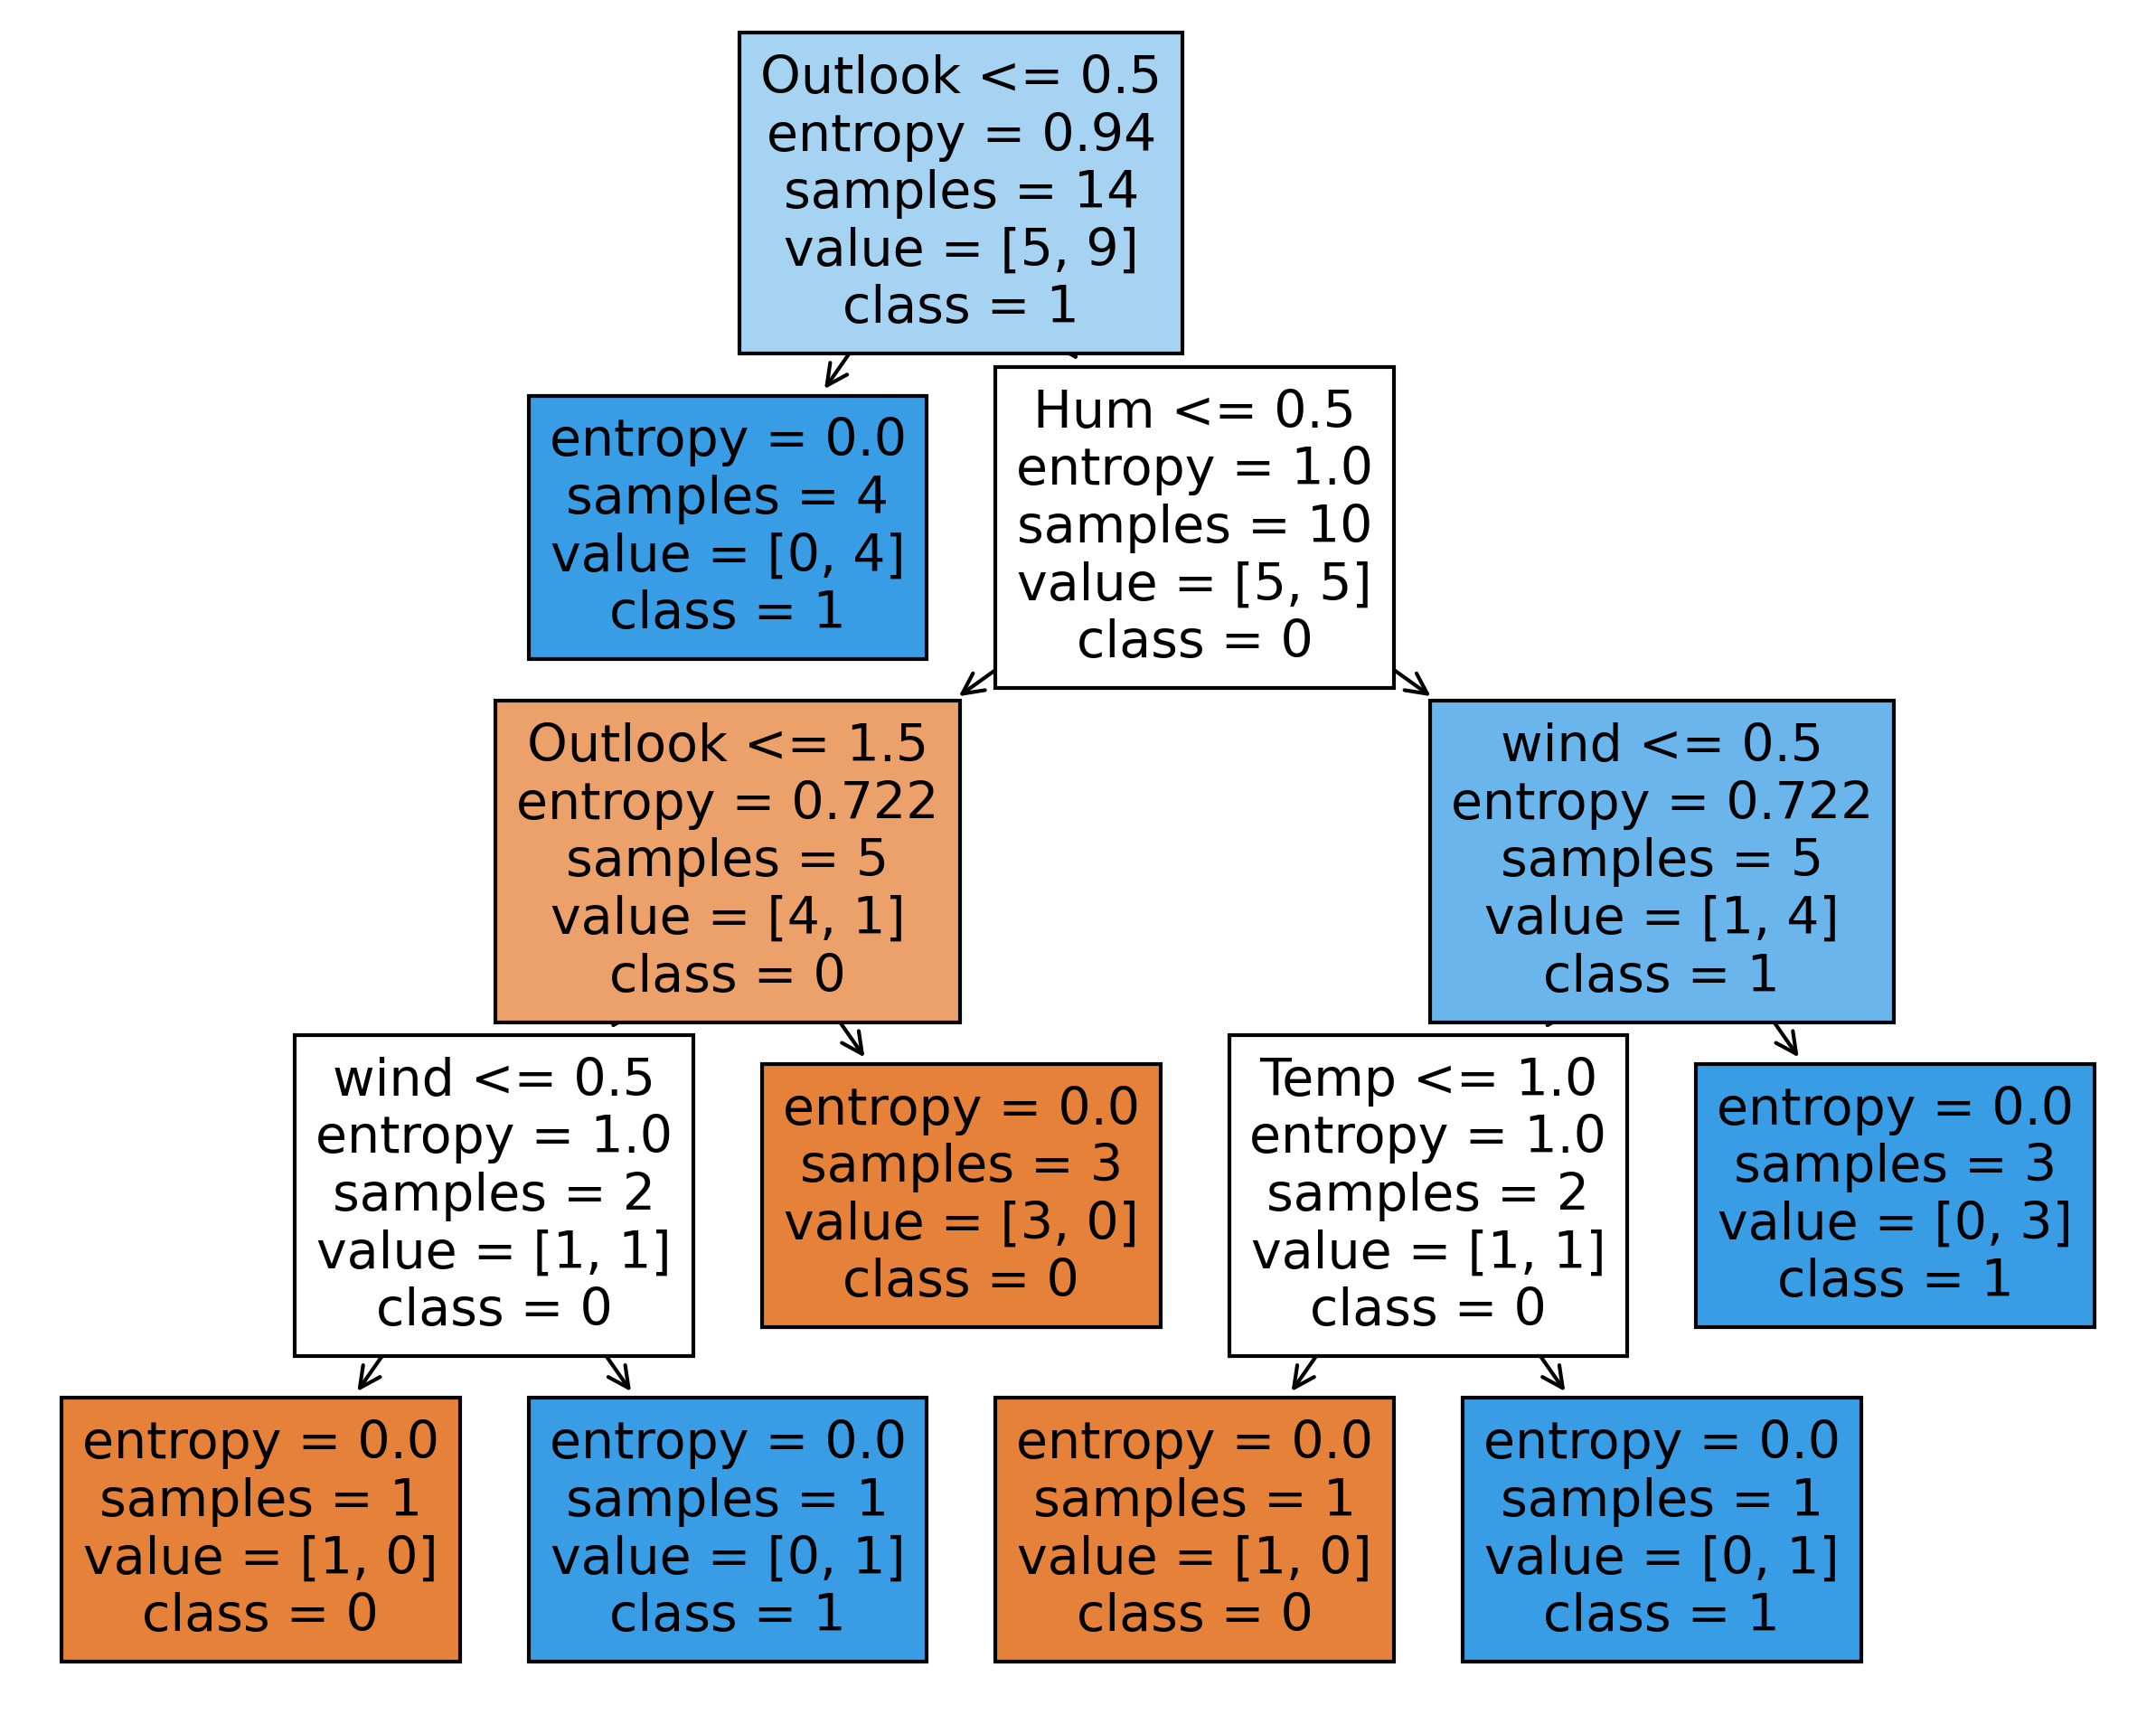

In [35]:
feature_names = ['Outlook', 'Temp', 'Hum', 'wind']
target_names = ['0', '1']

# Create a figure to save the plot
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 8), dpi=300)

# Plot the decision tree
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True, ax=axes)


# Save the plot as an image
# fig.savefig('Tree2.png')